In [147]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [148]:
data = pd.read_csv('files_for_lab/customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Check and clean the data

In [149]:
data.shape #Get the number of columns and rows

(7043, 21)

In [150]:
data.head() #Have a first look at the data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [151]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [152]:
data.value_counts('Churn') #seems imbalanced to the No

Churn
No     5174
Yes    1869
dtype: int64

In [153]:
data.value_counts('TotalCharges') #we have a blank values

TotalCharges
           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
260.8       1
260.7       1
2599.95     1
2598.95     1
999.9       1
Length: 6531, dtype: int64

In [154]:
data = data.set_index('customerID')
data.head() #We set customerID as the index since is unique

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [155]:
data.dtypes #change TotalCharges to float + tenure as a bool

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [156]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('bool')
data['TotalCharges'] = data['TotalCharges'].apply(lambda x: float(x.strip().replace("", "0")))
data.dtypes #making the changes

gender               object
SeniorCitizen          bool
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [157]:
data.describe().round(2) #A little bit more info about or numericals

,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00
mean,32.37,64.76,18947571.77
std,24.56,30.09,22090528.90
min,0.00,18.25,0.00
25%,9.00,35.50,309080.05
50%,29.00,70.35,10309040.05
75%,55.00,89.85,30708065.01
max,72.00,118.75,80608040.08


In [158]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts(), '\n')

Male      3555
Female    3488
Name: gender, dtype: int64 

No     3641
Yes    3402
Name: Partner, dtype: int64 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64 

No                     2810
Yes                    2707
No internet service    15

## EDA

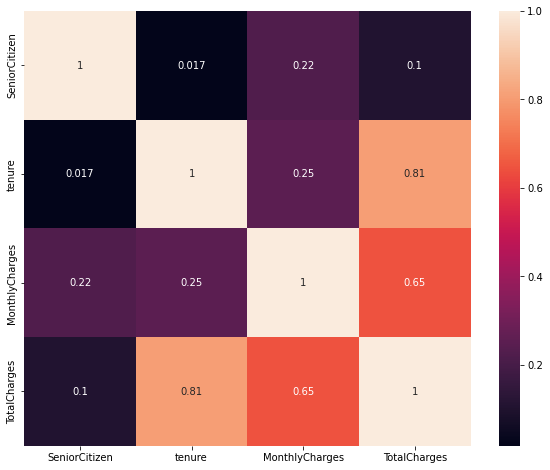

In [159]:
corr_matrix = data.corr(method='pearson')  #Check correlations
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

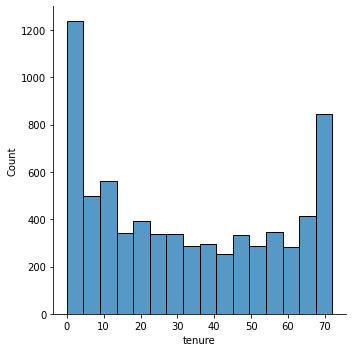

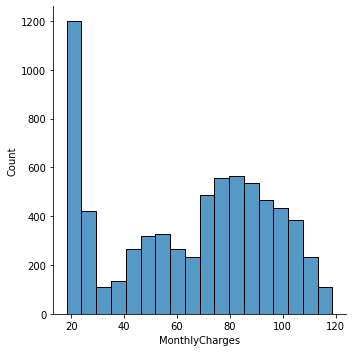

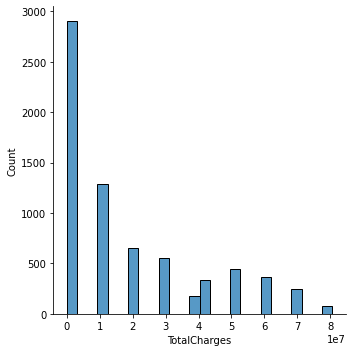

In [160]:
for col in data.select_dtypes(np.number):
    sns.displot(data[col])
    plt.show()

## Feature Engineering

In [161]:
#Extract the variables needed for the model, X-Y split

Y = data['Churn']
X = data[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [162]:
from scipy import stats

def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in data
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

X_trans, _ci = boxcox_transform(X)
X_trans

/var/folders/b0/97lm3p5x0nx10wzxr2t1gl5r0000gn/T/ipykernel_2619/2801906213.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column]<=0, np.NAN, data[column])
/var/folders/b0/97lm3p5x0nx10wzxr2t1gl5r0000gn/T/ipykernel_2619/2801906213.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].fillna(data[column].mean())
/var/folders/b0/97lm3p5x0nx10wzxr2t1gl5r0000gn/T/ipykernel_2619/2801906213.py:11: SettingWithCopyWarning: 
A value is trying to be set on a

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,0.000000,23.578295,16.861373
5575-GNVDE,8.796285,43.571734,103.221158
3668-QPYBK,0.815814,41.332735,40.201476
7795-CFOCW,10.300457,32.892530,103.213537
9237-HQITU,0.815814,53.391036,40.609760
...,...,...,...
6840-RESVB,7.177193,63.300009,103.408447
2234-XADUH,13.299215,76.033726,148.299715
4801-JZAZL,4.364654,23.388387,50.632356


## First model 

In [163]:
X = pd.get_dummies(X)
X #Do not have categoricals, therefore we do not get dummies

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,0.000000,23.578295,16.861373
5575-GNVDE,8.796285,43.571734,103.221158
3668-QPYBK,0.815814,41.332735,40.201476
7795-CFOCW,10.300457,32.892530,103.213537
9237-HQITU,0.815814,53.391036,40.609760
...,...,...,...
6840-RESVB,7.177193,63.300009,103.408447
2234-XADUH,13.299215,76.033726,148.299715
4801-JZAZL,4.364654,23.388387,50.632356


In [164]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [165]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, Y_train)

LogisticRegression(max_iter=10000, random_state=42)


### Evaluste First Model 

In [166]:
classification.score(X_test, Y_test) #We get this result because:
                                    # First, we only have 2 option on the taget variable, therefore 50% from the start
                                    #Second, because the result were so imbalanced it will lean more towards the most happende result

0.7955997161107168

In [167]:
predictions = classification.predict(X_test)
confusion_matrix(Y_test, predictions)

array([[949,  87],
       [201, 172]])

/Users/Pablofuster/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


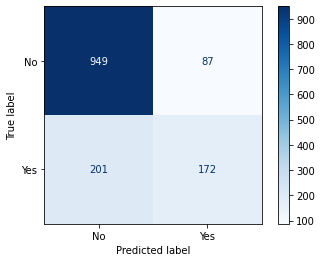

In [168]:
plot_confusion_matrix(classification, X_test, Y_test, cmap='Blues')
plt.show()

<AxesSubplot:>

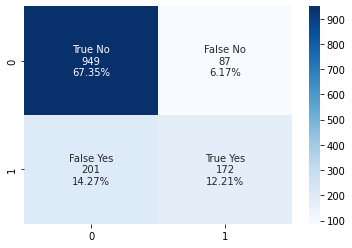

In [169]:
cf_matrix = confusion_matrix(Y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes']
               

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [170]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1036
         Yes       0.66      0.46      0.54       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



We get this result because:

    First, we only have 2 option on the taget variable, therefore 50% from the start.
    Second, because the result were so imbalanced it will lean more towards the most happende result.

## Model SMOTE

##### Upsampling

In [171]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [172]:
# Manually getting sample with the same amount as the minority class
#Yes = data[data['Churn'] == 'Yes'].sample(5000, replace=True) # needs the replace because it has less than 5000 rows
#No = data[data['Churn'] == 'No'].sample(5000) # don't need the replace because it has 5174 rows

In [173]:
#upsampled = pd.concat([Yes, No]).sample(frac=1)  #.sample(frac=1) here is just to shuffle the dataframe
#upsampled

In [174]:
# SMOTE
# Uses knn to create rows with similar features from the minority classes.
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_sm, Y_sm = smote.fit_resample(X, Y)
Y_sm.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [175]:
X = pd.get_dummies(X)
X

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,0.000000,23.578295,16.861373
5575-GNVDE,8.796285,43.571734,103.221158
3668-QPYBK,0.815814,41.332735,40.201476
7795-CFOCW,10.300457,32.892530,103.213537
9237-HQITU,0.815814,53.391036,40.609760
...,...,...,...
6840-RESVB,7.177193,63.300009,103.408447
2234-XADUH,13.299215,76.033726,148.299715
4801-JZAZL,4.364654,23.388387,50.632356


In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [177]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_sm, Y_sm)

LogisticRegression(max_iter=10000, random_state=42)

In [178]:
classification.score(X_test, Y_test)

0.7402413058907026

In [179]:
predictions = classification.predict(X_test)
confusion_matrix(Y_test, predictions)

array([[750, 286],
       [ 80, 293]])

In [180]:
pd.Series(predictions).value_counts()

No     830
Yes    579
dtype: int64

<AxesSubplot:>

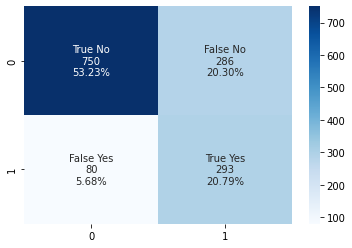

In [181]:
cf_matrix = confusion_matrix(Y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes']
               

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [182]:
print(classification_report(Y_test, predictions))

# After banlancing Churn data with SMOTE, prediction of 'Yes' values has improved considerably, as shown by recall values

              precision    recall  f1-score   support

          No       0.90      0.72      0.80      1036
         Yes       0.51      0.79      0.62       373

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [184]:
# AUC ROC measures the probabilities over the decision of the correct class,
## so for the other metrics a wrong prediction 0.2 --> 1.0 = 0.49 --> 1.0,
## while for AUC ROC 0.49 would be considered a smaller mistake

roc_auc = metrics.roc_auc_score(np.where(Y_test == 'Yes', 1, 0), np.where(predictions == 'Yes', 1, 0))
roc_auc

0.7547305060709886

## Model TOMEK LINKS

In [187]:
# BoxCox transform

X_trans, _ci = boxcox_transform(X)

# Train-Test split

X_train, X_test, Y_train, Y_test = train_test_split(X_trans, Y, test_size=0.2, random_state=42)

# TOMEK Links

from imblearn.under_sampling import TomekLinks

tomek = TomekLinks()
X_train_tl, Y_train_tl = tomek.fit_resample(X_train, Y_train)
Y_train_tl.value_counts()

# Tomek Links works better for smaller imbalances

No     3690
Yes    1496
Name: Churn, dtype: int64

In [188]:
classification = LogisticRegression(random_state=42, multi_class='multinomial', max_iter=10000)
classification.fit(X_train_tl, Y_train_tl)

LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42)

In [189]:
classification.score(X_test, Y_test)

0.7856635911994322

In [191]:
predictions = classification.predict(X_test)
confusion_matrix(Y_test, predictions)


array([[923, 113],
       [189, 184]])

In [192]:
pd.Series(predictions).value_counts()

No     1112
Yes     297
dtype: int64

<AxesSubplot:>

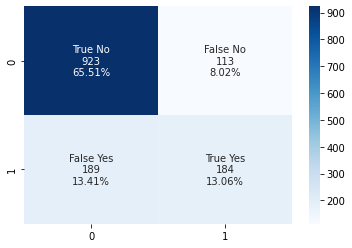

In [193]:
cf_matrix = confusion_matrix(Y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes']
               

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [195]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1036
         Yes       0.62      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



In [ ]:
# Banlancing Churn data with Tomek Links improves a tad the prediction of 'Yes' values